In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE=32
IMAGE_SIZE=255
CHANNEL=3
EPOCHS=20

In [ ]:
# dataset=tf.keras.preprocessing.image_dataset_from_directory(
#     directory="Potato",
#     seed=123,
#     shuffle=True,
#     image_size=[IMAGE_SIZE,IMAGE_SIZE],
#     batch_size=BATCH_SIZE
# )

Found 1500 files belonging to 3 classes.


In [ ]:
# class_names=dataset.class_names

In [ ]:
# class_names

['Test', 'Train', 'Valid']

In [59]:
import numpy as np
# for batch_size,label_size in dataset.take(1):
#     print("image shape : ",batch_size.shape)
#     print("label : ",label_size.numpy)
#     print("image : ",batch_size[0])
    

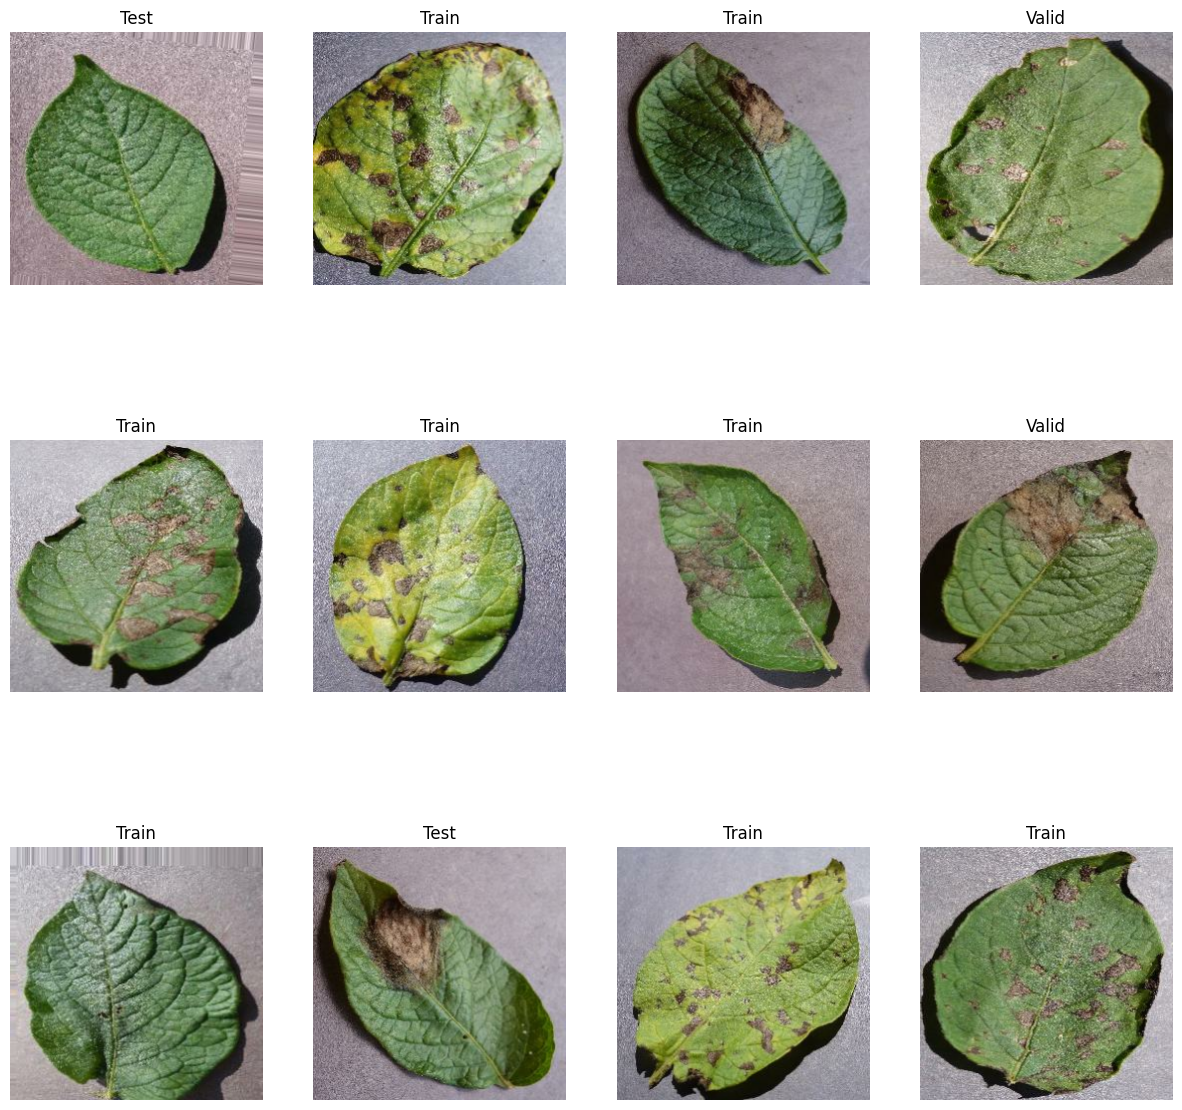

In [ ]:
# plt.figure(figsize=(15,15))
# for img ,label in dataset.take(1):
#     for i in range (12):
#         aax=plt.subplot(3,4,i+1)
#         plt.imshow(img[i].numpy().astype('uint8'))
#         plt.title(class_names[label[i]])
#         plt.axis('off')

In [ ]:
# len(dataset)

47

In [82]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory="Potato/Train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory="Potato/Valid",
    seed=123,
    shuffle=False,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 900 files belonging to 3 classes.
Found 300 files belonging to 3 classes.


In [83]:
class_names = train_ds.class_names


In [61]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory="Potato/Test",
    seed=123,
    shuffle=False,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 300 files belonging to 3 classes.


In [80]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [63]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
])


In [64]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])


In [65]:
train_ds=train_ds.map(lambda x,y : (data_augmentation(x,training=True),y)).prefetch(buffer_size=tf.data.AUTOTUNE)


In [66]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 255, 255, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [67]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
    
])


model.build(input_shape=input_shape)

/Users/subhasisjena/crop_dieases_prediction_app/cropenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


In [70]:
history=model.fit(train_ds,
                  batch_size=BATCH_SIZE,
                  validation_data=val_ds,
                  verbose=1,
                  epochs=20
                )

Epoch 1/20


/Users/subhasisjena/crop_dieases_prediction_app/cropenv/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:1214: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 530ms/step - accuracy: 0.3633 - loss: 1.0781 - val_accuracy: 0.5633 - val_loss: 0.9567
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 523ms/step - accuracy: 0.6278 - loss: 0.8096 - val_accuracy: 0.7333 - val_loss: 0.6733
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 535ms/step - accuracy: 0.8022 - loss: 0.4864 - val_accuracy: 0.7933 - val_loss: 0.4374
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 558ms/step - accuracy: 0.8122 - loss: 0.4506 - val_accuracy: 0.8200 - val_loss: 0.4243
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 494ms/step - accuracy: 0.8289 - loss: 0.3972 - val_accuracy: 0.8467 - val_loss: 0.3346
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 507ms/step - accuracy: 0.8433 - loss: 0.3615 - val_accuracy: 0.8133 - val_loss: 0.3811
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 511ms/step - accuracy: 0.9089 - loss: 0.2467 - val_accuracy: 0.9233 - val_loss: 0.1972
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 504ms/step - accuracy: 0.9044 - loss: 0.2400 - val_accuracy: 0.873

In [73]:
model.save("model.keras")


In [74]:
from tensorflow.keras.models import load_model

In [75]:
mademodel = load_model("model.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Actual label: Potato___healthy
Predicted label: Potato___healthy


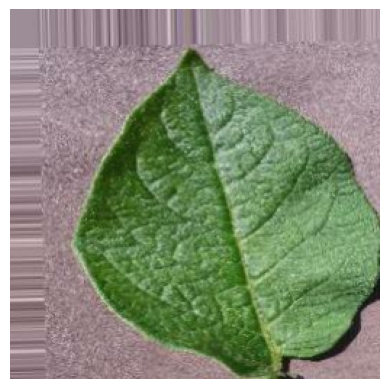

In [85]:

for img, label in test_ds.take(1):
    first_img = img[0].numpy().astype("uint8")
    first_label = label[0].numpy()

    pred_img = mademodel.predict(img)

    plt.imshow(first_img)
    plt.axis("off")

    print("Actual label:", class_names[first_label])
    print("Predicted label:", class_names[np.argmax(pred_img[0])])


In [86]:
def predict(mademodel, img):
    img_array = tf.expand_dims(img, 0)   # batch dimension
    prediction = mademodel.predict(img_array)
    predicted_class = class_names[np.argmax(prediction[0])]
    confidence = round(100 * np.max(tf.nn.softmax(prediction[0])), 2)
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


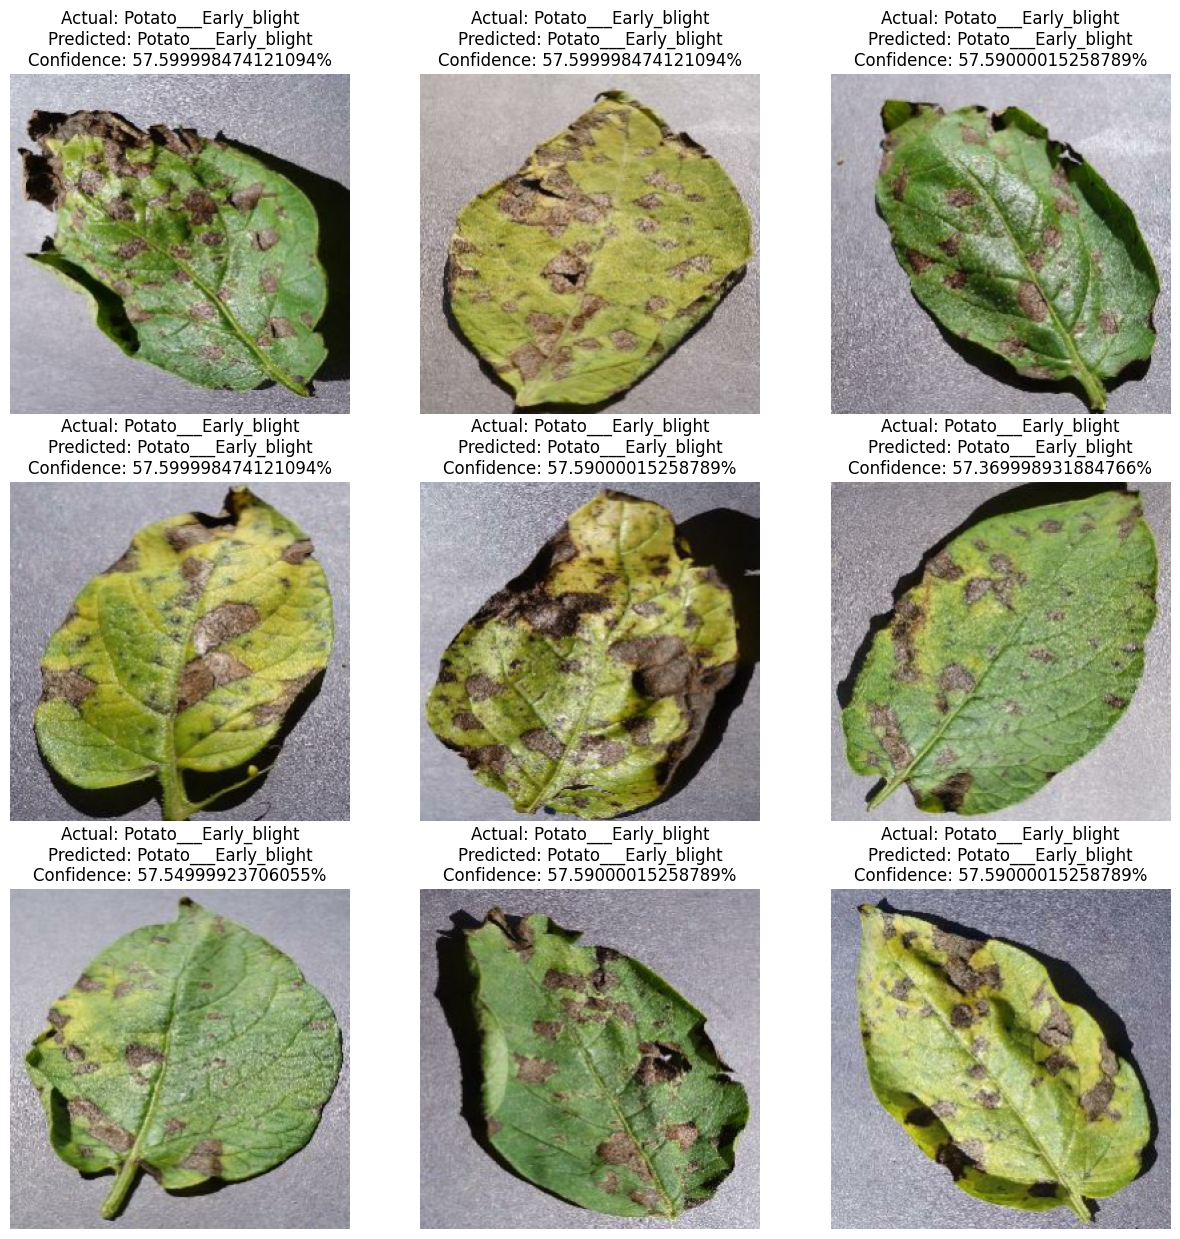

In [87]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)

        predicted_class, confidence = predict(mademodel, images[i])

        plt.imshow(images[i].numpy().astype("uint8"))
        actual_class = class_names[labels[i]]

        plt.title(
            f"Actual: {actual_class}\n"
            f"Predicted: {predicted_class}\n"
            f"Confidence: {confidence}%"
        )

        plt.axis("off")
